In [61]:
import numpy as np
import networkx as nx
import random as rdm

In [62]:
# Input files #################
# Funcion para leer input files
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

archive_mul="./yeast_LIT_Reguly_curado.txt"

###### Grafo bin
lista_mul = ldata(archive_mul)
Gmul = nx.Graph()
Gmul.add_edges_from(lista_mul)

N = Gmul.number_of_nodes()
m = Gmul.number_of_edges()

essentials=[]
l_essential = ldata("./Essential_ORFs_paperHe_curado.txt")
for i in range (0,np.size(l_essential)):
    essentials.append(l_essential[i])

dummy = list(Gmul.nodes())
essential_index=[]

#Esto me da el numero de nodos esenciales 
essentials = np.asarray(l_essential)
essentials = set(dummy) & set(essentials.flat)
essentials = list(essentials)

for i in range(0,np.size(dummy)):
    for j in range(0,np.size(essentials)):
        if dummy[i] == essentials[j]:
          essential_index.append(i)
        
#El numero de enlaces esenciales es la suma de los enlaces que conectan nodos esenciales
A = nx.to_numpy_matrix(Gmul)
me = 0
for i in essential_index:
  for j in range(0,N):
    if A[i,j] == 1 and j in essential_index:
      me = me + 1   

In [63]:
print "Empezando aleatorizacion"

#Esto se utiliza para recablear aleatoriamente cuidando la distribucion de grados,
#Este metodo no genera loops. Mantiene la matriz de conecciones simetrica

size = (N*N)-N
list_merand = []
for random in range(0,2):
  k = 1
  l = 0
  F = np.zeros(size/2)
  F1 = F
  F0 = np.zeros((N,N))
  F2 = F0
#En este primer ciclo busco la parte a simetrizar, la suma de esta parte debe ser igual a la suma de grados de la red
  for i in range(0,N): 
    for j in range(k,N):
      F[l] = A[i,j]
      l = l+1
    k = k + 1
#Aqui se distriuyen al azar
  np.random.shuffle(F)
  k = 1
  l = 0
#En este ciclo se re arma la matriz cuidando que quede simetrica.
  for i in range(0,N):
    for j in range(k,N):
      F0[i,j] = F[l]
      F0[j,i] = F[l]
      l = l+1  
    k = k + 1
    
  B = np.sum(F0,axis=1)
  
  me_rand = 0  
  for i in essential_index:
    for j in range(0,N):
      if F0[i,j] == 1 and j in essential_index:
        me_rand = me_rand + 1
  list_merand.append(me_rand) 

alpha = (me - np.mean(list_merand))/m

print "alpha ="
print alpha

beta = np.zeros(2)
Ne = np.size(essentials)
for random in range(0,2):
#Para calcular la Beta
  me_rand_00 = me - np.random.choice(list_merand) #Enlaces esenciles aleatorios por marcar
  for i in range(0,me_rand_00):
    F1[i]= 1
#Aqui se distriuyen al azar los enlaces
  np.random.shuffle(F1)
  k = 1
  l = 0
#En este ciclo se re arma la matriz cuidando que quede simetrica. Aqui solo existen enlaces esenciales
  sample0a = []
  sample0b = []  
  for i in range(0,N):
    for j in range(k,N):
      F2[i,j] = F1[l]
      F2[j,i] = F1[l]
      if F2[i,j] == 1:
        sample0a.append(i)
        sample0b.append(j)
      l = l+1  
    k = k + 1
#Vemos cuantos nodos son esenciales        
    ne_rand = np.size(set(sample0a))

  X = Ne - ne_rand #Cantidad de nodos esenciales por agregar
  if X > 0:
    beta[random] = (X+0.0)/(N-ne_rand)

Beta = np.mean(beta)

print "Beta ="
print Beta

Empezando aleatorizacion
alpha =
0.4069855732725892
Beta =
0.27225767243998783


In [64]:
#Para sacar el grado de los nodos esenciales
ks = np.sum(A, axis=1)
flag = np.amax(ks)

j = 0
KE = np.zeros(np.size(essential_index))
for i in essential_index:
  KE[j] = ks[i]
  j = j+1

a = np.amax(KE)-np.amin(KE)
print np.amax(ks)

Ke = np.zeros(int(np.size(ks)))
for i in essential_index:
  Ke[j] = ks[i]
  j = j+1

319.0


In [65]:
histo, bines = np.histogram(ks,bins=int(np.amax(ks)))

In [66]:
ke = np.zeros(22)
for i in range(0,22):
  ke[i] = np.size(np.where(KE==i))
  if ke[i] != 0 and histo[i] != 0:
        ke[i] = (ke[i] + 0.0)/histo[i]

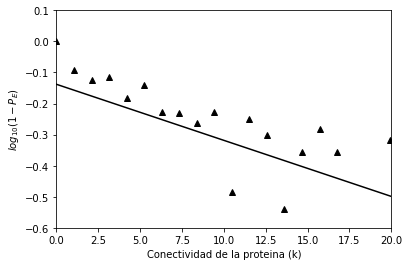

In [67]:
from matplotlib import pyplot as plt
x = np.linspace(0,22,22)
y = x*np.log10(1-0.1*alpha) + np.log10(1-Beta)
plt.xlim(0,20)
plt.ylim(-0.6,0.1)
plt.ylabel(r'$log_{10}(1-P_{E})$')
plt.xlabel(r'Conectividad de la proteina (k)')
plt.plot(x,np.log10(1-ke),'k^')
plt.plot(x,y,'k-')
plt.savefig('yeast_LIT.png', dpi=300,  bbox_inches='tight')

In [68]:
print 'nodos'
print N
print 'enlaces'
print m
print 'nodos esenciales'
print np.size(essentials)
print 'enlaces esenciales'
print me
print "alpha"
print 0.1*alpha
print "beta"
print Beta

nodos
3292
enlaces
11853
nodos esenciales
897
enlaces esenciales
6518
alpha
0.040698557327258925
beta
0.27225767243998783
